In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from time import time
from datetime import datetime

In [ ]:
"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier 
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)  
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema

In [ ]:
"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
  
  time_format = "%Y-%m-%d %H:%M:%S"
  
  sum_pv = 0
  sum_volume = 0
  
  vwap = []
  
  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):
    
    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Major Project 8th sem/Code/data/reliance_2years_60min.csv")
df = df.iloc[-1000:].reset_index(drop=True)


In [ ]:
print(f"Number of data points {len(df)}")
df.isnull().sum()

Number of data points 1000


Unnamed: 0    0
open          0
high          0
low           0
close         0
volume        0
time          0
dtype: int64

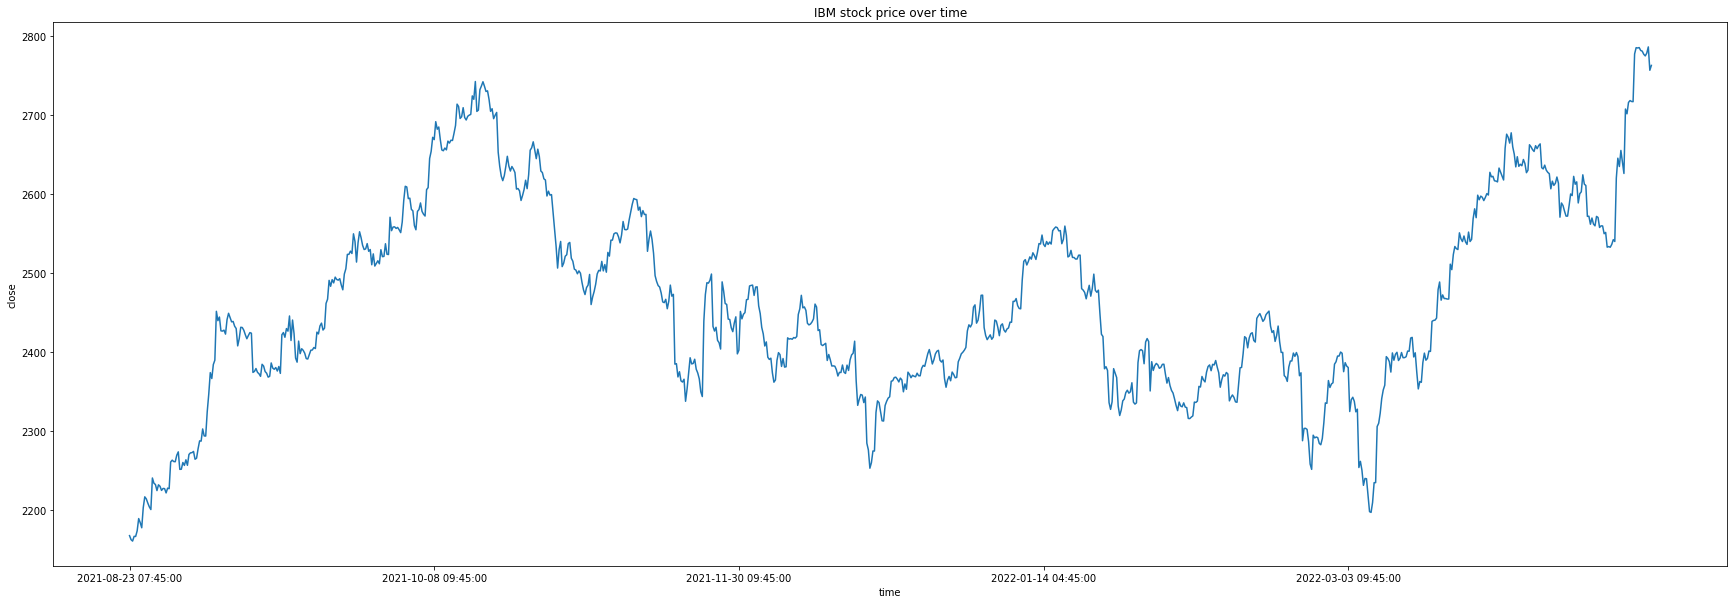

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["time"], df["close"])
plt.xticks(np.arange(0,len(df), 200), df['time'][0:len(df):200])
plt.title("IBM stock price over time")
plt.xlabel("time")
plt.ylabel("close")
plt.show()

In [ ]:
# price list
price = list(df["close"].values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(df)
print(f"len vwap = {len(vwap)}")

len prices = 1000
 Days 10 
 Length of prices 1000
 Length of EMA list 990
len ema = 990
len vwap = 1000


In [ ]:
# make all ema, vwap, prices lists of equal length 
price = price[-len(ema):]
vwap = vwap[-len(ema):]

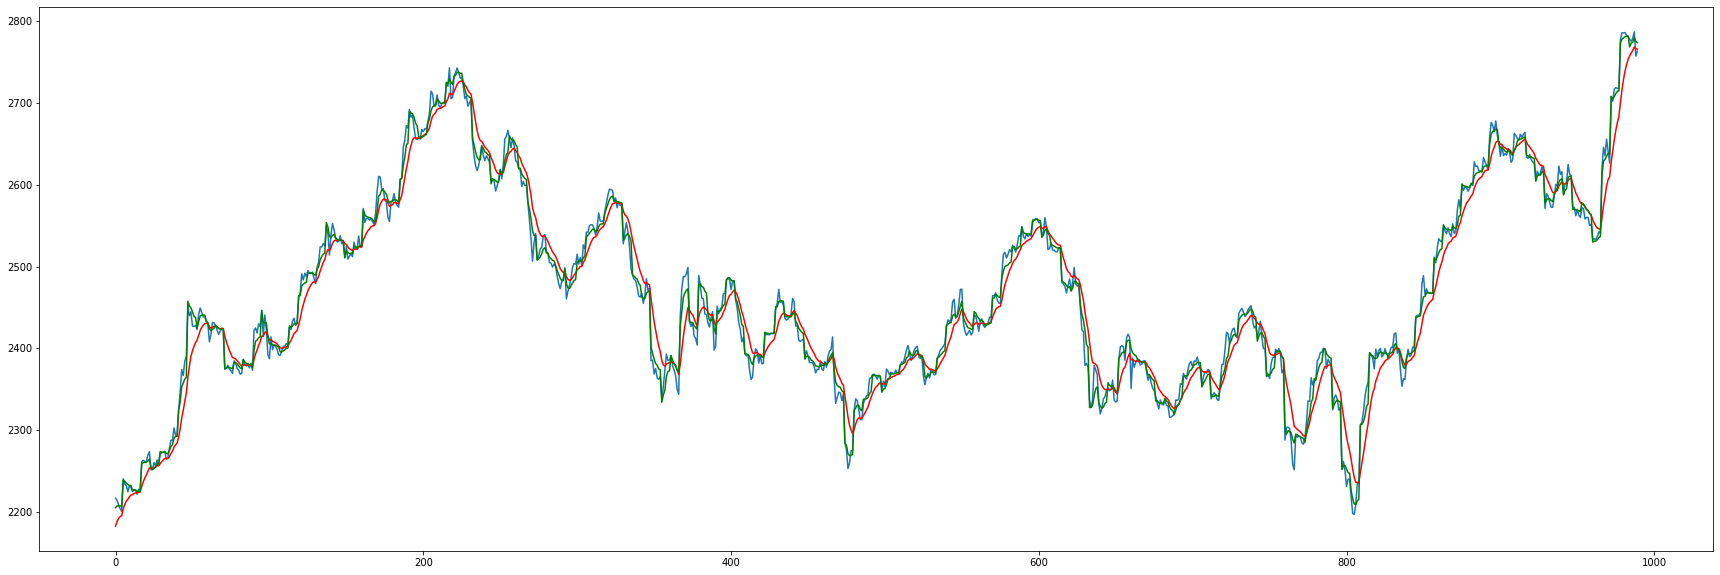

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(price, label="price")
plt.plot(ema, color='red', label="ema")
plt.plot(vwap,color='green', label="vwap")

plt.legend()

plt.show()

In [ ]:
calculate_vwap(df)

[2164.9833170572915,
 2163.6761828916533,
 2163.3279369975376,
 2165.9166666666665,
 2165.719927423488,
 2168.13669716645,
 2174.7053926018893,
 2177.462390381868,
 2177.71613434861,
 2199.449951171875,
 2205.6174995766987,
 2207.745744010073,
 2207.965314805777,
 2207.8359623651336,
 2207.2063686593274,
 2239.2166341145835,
 2237.669834125494,
 2235.4992436293414,
 2234.0886257793863,
 2232.6460673112606,
 2232.4503163883446,
 2227.1666666666665,
 2227.069931245795,
 2227.06915995456,
 2225.4627255596347,
 2225.7645886118016,
 2225.8900421023195,
 2258.6666666666665,
 2260.6440291408,
 2260.8536139074395,
 2260.974780304039,
 2262.5057284521663,
 2264.6015287235127,
 2255.1000162760415,
 2252.1535381485355,
 2253.6627379812226,
 2254.9223544212928,
 2259.139309122316,
 2258.846529254066,
 2274.199951171875,
 2273.2109530208622,
 2273.203997742392,
 2273.426322174897,
 2271.9292985651296,
 2271.2252379456386,
 2275.3500162760415,
 2280.249178650274,
 2282.3924622543177,
 2290.572093988

In [ ]:
x = df["time"][0].split()
x = x[0] + "/" + x[1]
x

'2021-08-23/07:45:00'

In [ ]:
datetime.strptime(x, "%Y-%m-%d/%H:%M:%S")

datetime.datetime(2021, 8, 23, 7, 45)

In [ ]:
def calculate_rsi(df):
  

SyntaxError: ignored